# Laboratorio 4. Ejercicio 1



Una prestigiosa empresa productora de vinos quiere construir un modelo de regresión que le permita predecir
el porcentaje de alcohol de un vino en base a ciertas características (acidez, azúcar residual, azufre, cloruros,
densidad, tipo de vino, sulfatos y pH).

### 1.   Realizar todo el proceso de preparación, limpieza y análisis de los datos con el objetivo de identificar aquellas variables candidatas para el proceso de regresión

In [3]:
# Importamos las librerías
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Cargamos los datos
data = pd.read_csv("wine_alcohol.csv",sep = ";")

# Exploramos los datos
# Obtenemos información sobre el dataset
print("Informacion sobre el dataset")
print(data.info())

# Estadísticas descriptivas
print("Estadisticas descriptivas")
print(data.describe())

# Eliminamos la variable id
data.drop('id', axis=1, inplace=True)

# Verificar si hay valores nulos
if data.isnull().sum().sum() == 0:
    print("No hay valores nulos")
# Como no hay valores nulos no modificamos la base de datos

Informacion sobre el dataset
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    6497 non-null   int64  
 1   fixed acidity         6497 non-null   float64
 2   volatile acidity      6497 non-null   float64
 3   citric acid           6497 non-null   float64
 4   residual sugar        6497 non-null   float64
 5   chlorides             6497 non-null   float64
 6   free sulfur dioxide   6497 non-null   float64
 7   total sulfur dioxide  6497 non-null   float64
 8   density               6497 non-null   float64
 9   pH                    6497 non-null   float64
 10  sulphates             6497 non-null   float64
 11  quality               6497 non-null   int64  
 12  wine type             6497 non-null   int64  
 13  alcohol               6497 non-null   float64
dtypes: float64(11), int64(3)
memory usage: 710.

Hemos realizado un análisis de la base de datos para asegurarnos de que ni hay datos que no tengan sentido ni variables nulas. Es por esto que primero hemos visto si había alguna variable nula, que no la hay, y después hemos hecho un análisis estadístico descriptivo. En el análisis descriptivo podemos ver los mínimos y máximos de cada variable y, por tanto, ver si hay datos que no se encuentren dentro de un rango de normalidad. Aunque haya variables cuyos máximos y mínimos se distancien mucho, como el dióxido de azufre libre con una diferencia de aproximadamente 288 y el dióxido de azufre total con una diferencia de aproximadamente 434. A pesar de que los niveles de ambos son altos y pueden llegar a ser preocupantes para un vino, el hecho de que la media se sitúe entre 30 y 115 respectivamente nos dice que estos altos valores no representan a la mayoría de los vinos sino que son la excepción y el resto de vinos se encuentran en niveles normales de dióxido de azufre libres y totales normales.

### 2. Realizar un análisis sobre los atributos del dataset con el objetivo de entender las posibles relaciones que existen entre ellas y a continuación elige los dos atributos que mayor relación guardan con el atributo objetivo (nivel de alcohol)

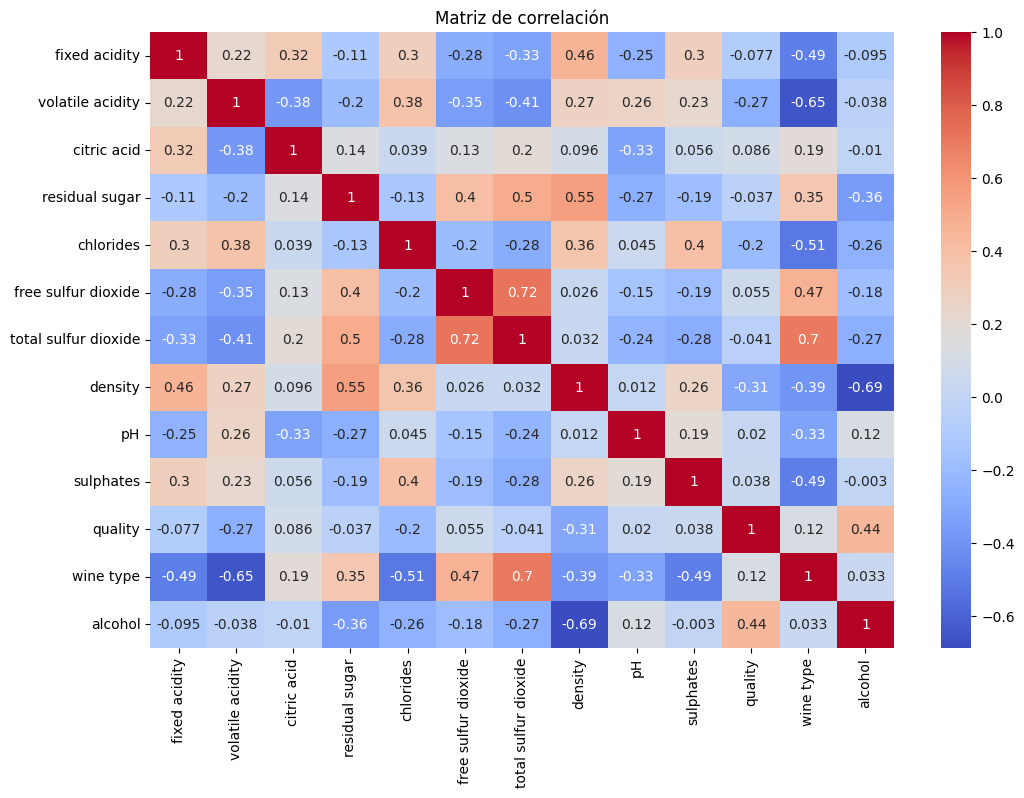

In [4]:
# Gráfico de correlación
correlation_matrix = data.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title("Matriz de correlación")
plt.show()


La base de datos tiene los siguientes atributos, que después relacionaremos con el nivel de alcohol:

1. Acidez fija: Determina la estabilidad y el equilibrio del vino.
2. Acidez volátil: Contribuye al aroma y puede indicar problemas de fermentación.
3. Ácido cítrico: Aporta frescura y sabor cítrico al vino.
4. Azúcar residual: Influye en el dulzor y la sensación en boca.
5. Cloruros: Pueden afectar negativamente al sabor si están en niveles altos.
6. Dióxido de azufre libre: Actúa como conservante y antioxidante.
7. Dióxido de azufre total: Indica el nivel total de conservante en el vino.
8. Densidad: Relacionada con el contenido de alcohol y el cuerpo del vino.
9. pH: Importante para la estabilidad microbiológica y el equilibrio del vino.
10. Sulfatos: Pueden afectar al aroma y a la calidad del vino.
11. Calidad: Influenciada por todos los parámetros anteriores y otros factores.
12. Tipo de vino: Define sus características y su proceso de elaboración.

Ahora, analizando el gráfico de correlación mostrado previamente, podemos ver que, en general, no hay mucha correlación entre las variables previamente mencionadas y la variable objetivo, el porcentaje de alcohol de un vino. Aún así, podemos hacer un análisis basado en el gráfico.
Ordenaremos de mayor a menor las variables que tengan más correlación (en valor absoluto) con la objetivo:

Density con una correlación de -0.69

Quality con una correlación de 0.44

Residual sugar con una correlación de -0.36

Total sulfur dioxide con una correlación de -0.27

Chlorides con una correlación de -0.26

Free sulfur dioxide con una correlación de -0.18

pH con una correlación de 0.12

Dado que estamos buscando los dos atributos que tienen una mayor relación con el porcentaje de alcohol en el vino, podemos observar que la densidad y la calidad de la botella son los dos atributos que muestran la correlación más significativa con esta variable.

1. **Densidad (-0.69)**: La densidad del vino está inversamente relacionada con el porcentaje de alcohol. Esto se debe a que a medida que aumenta el contenido de alcohol en el vino, la densidad tiende a disminuir. Esta relación se explica por la física de la mezcla de líquidos de diferentes densidades. Cuanto mayor sea el contenido de alcohol, menor será la densidad del vino.

2. **Calidad (0.44)**: Aunque la correlación no es tan alta como la de la densidad, la calidad del vino también tiene una relación notable con el porcentaje de alcohol. Esto puede deberse a que vinos de mayor calidad suelen tener un contenido de alcohol más equilibrado y bien integrado, lo que podría elevar el porcentaje de alcohol en comparación con vinos de menor calidad.

Estos dos atributos destacan como los dos más relevantes para predecir el porcentaje de alcohol en el vino, basándonos en los datos empíricos obtenidos y su correlación con la variable objetivo.

### 3. Construir un modelo de regresión lineal mediante un proceso analítico para una de las variables seleccionadas en el punto anterior

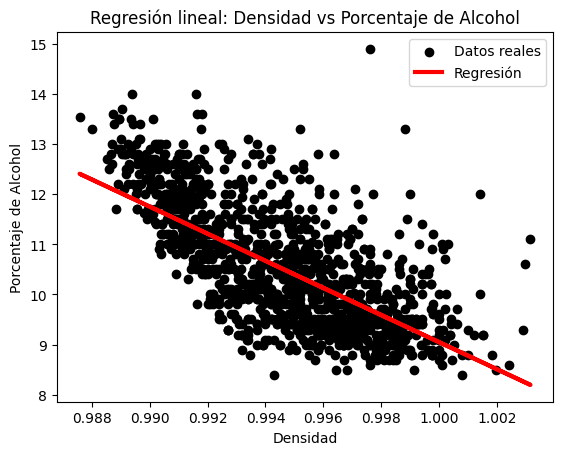

   Variable       MSE       R^2      Intercepto (β0)       Coeficiente (β1)
0  Densidad  0.734381  0.487868  [279.7246243184653]  [-270.67807633073187]


In [9]:
##################################Densidad##################################
# Supongamos que tienes un DataFrame llamado 'data' que contiene las variables seleccionadas
# 'density' como variable predictora y 'alcohol' como variable objetivo

# Variables predictoras
X1 = data[['density']].values

# Variable objetivo
y1 = data['alcohol'].values

# Dividir los datos en conjuntos de entrenamiento y prueba
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.2, random_state=42)

# Calcular la media de X1_train y y1_train
mean_X1 = np.mean(X1_train)
mean_y1 = np.mean(y1_train)

# Calcular la diferencia entre cada valor y la media
n = len(X1_train)
numerator = 0
denominator = 0
for i in range(n):
    numerator += (X1_train[i] - mean_X1) * (y1_train[i] - mean_y1)
    denominator += (X1_train[i] - mean_X1) ** 2

# Calcular los coeficientes
coeficiente1 = numerator / denominator
intercepto1 = mean_y1 - (coeficiente1 * mean_X1)

# Hacer predicciones en el conjunto de prueba
predicciones1 = []
for x in X1_test:
    y_pred = coeficiente1 * x + intercepto1
    predicciones1.append(y_pred)
predicciones1 = np.array(predicciones1)

# Calcular las métricas de evaluación
mse1 = mean_squared_error(y1_test, predicciones1)
r21 = r2_score(y1_test, predicciones1)

# Graficar los resultados
plt.scatter(X1_test, y1_test, color='black', label='Datos reales')
plt.plot(X1_test, predicciones1, color='red', linewidth=3, label='Regresión')

# Etiquetas y título
plt.xlabel('Densidad')
plt.ylabel('Porcentaje de Alcohol')
plt.title('Regresión lineal: Densidad vs Porcentaje de Alcohol')

# Mostrar la leyenda
plt.legend()

# Mostrar el gráfico
plt.show()

# Crear un DataFrame para mostrar los resultados
resultados = pd.DataFrame({
    'Variable': ['Densidad'],
    'MSE': [mse1],
    'R^2': [r21],
    'Intercepto (β0)': [intercepto1],
    'Coeficiente (β1)': [coeficiente1]
})

# Mostrar los resultados
print(resultados)

### 4. Calcular el error en el modelo obtenido en el punto anterior

Para determinar cuál de los modelos es mejor, podemos analizar los resultados del MSE (Mean Squared Error) y del coeficiente de determinación (R^2).

El MSE es una medida de la calidad del ajuste del modelo a los datos, donde valores más bajos indican un mejor ajuste.

El coeficiente de determinación indica la proporción de la varianza en la variable dependiente que es predecible a partir de las variables independientes. Valores más cercanos a 1 indican un mejor ajuste del modelo.

Basándonos en los resultados obtenidos:

1. **Modelo basado en la densidad:**
   - MSE: 0.734381
   - (R^2): 0.487868

Observamos que el modelo basado en la densidad tiene un MSE bajo y un (R^2) alto. Esto sugiere que el modelo basado en la densidad tiene un buen ajuste a los datos y es capaz de explicar la variabilidad en el porcentaje de alcohol del vino.
